<a href="https://colab.research.google.com/github/georgywasiat/Time-Series-Prediction-of-BBCA-Stock-Prices-using-Linear-Regression/blob/main/Time_Series_Prediction_of_BBCA_Stock_Prices_using_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Georgy Banny Rizky Wasiat

Prediksi Harga Saham BBCA dengan Regresi Linear

In [ ]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
BBCA = pd.read_csv('/content/drive/My Drive/Portofolio/BBCA.csv')

In [ ]:
BBCA.head(10)

,date,previous,open_price,first_trade,high,low,close,change,volume,value,...,bid_volume,listed_shares,tradeble_shares,weight_for_index,foreign_sell,foreign_buy,delisting_date,non_regular_volume,non_regular_value,non_regular_frequency
0,2019-07-29T00:00:00,30975.0,31100.0,31100.0,31150.0,30800.0,30950.0,-25.0,13701900.0,4.246726e+11,...,1250400.0,2.440846e+10,2.440846e+10,2.440846e+10,4199100.0,3782800.0,NaN,6607083.0,2.056272e+11,39.0
1,2019-07-30T00:00:00,30950.0,31025.0,31025.0,31250.0,30950.0,31100.0,150.0,7645100.0,2.375243e+11,...,1900.0,2.440846e+10,2.440846e+10,2.440846e+10,3859500.0,4278300.0,NaN,8274494.0,2.570538e+11,44.0
2,2019-07-31T00:00:00,31100.0,30950.0,31100.0,31200.0,30900.0,30950.0,-150.0,12825800.0,3.977603e+11,...,1223000.0,2.440846e+10,2.440846e+10,2.440846e+10,7957300.0,8680200.0,NaN,10022093.0,3.113416e+11,57.0
3,2019-08-01T00:00:00,30950.0,30950.0,30950.0,31350.0,30925.0,31050.0,100.0,15645600.0,4.865419e+11,...,19500.0,2.440846e+10,2.440846e+10,2.440846e+10,6683700.0,13290800.0,NaN,7091288.0,2.210745e+11,35.0
4,2019-08-02T00:00:00,31050.0,30800.0,30825.0,31025.0,30800.0,30825.0,-225.0,12597900.0,3.892295e+11,...,1027000.0,2.440846e+10,2.440846e+10,2.440846e+10,9195000.0,2639100.0,NaN,2103060.0,6.523255e+10,32.0
5,2019-08-05T00:00:00,30825.0,31075.0,31075.0,31075.0,30000.0,30000.0,-825.0,18184800.0,5.507566e+11,...,1267600.0,2.440846e+10,2.440846e+10,2.440846e+10,14047600.0,3717100.0,NaN,3710723.0,1.150434e+11,35.0
6,2019-08-06T00:00:00,30000.0,29400.0,29400.0,29775.0,28825.0,29400.0,-600.0,36659200.0,1.076796e+12,...,1227200.0,2.440846e+10,2.440846e+10,2.440846e+10,31806700.0,9755600.0,NaN,269.0,7.857050e+06,6.0
7,2019-08-07T00:00:00,29400.0,29875.0,29875.0,30250.0,29525.0,30050.0,650.0,18420400.0,5.526591e+11,...,2465800.0,2.440846e+10,2.440846e+10,2.440846e+10,11587400.0,10458200.0,NaN,477829.0,1.415842e+10,34.0
8,2019-08-08T00:00:00,30050.0,30050.0,30050.0,30400.0,29900.0,30025.0,-25.0,11659100.0,3.514534e+11,...,3598700.0,2.440846e+10,2.440846e+10,2.440846e+10,6717800.0,6910600.0,NaN,512198.0,1.538736e+10,64.0
9,2019-08-09T00:00:00,30025.0,30275.0,30275.0,30600.0,30275.0,30325.0,300.0,9623700.0,2.922159e+11,...,1092400.0,2.440846e+10,2.440846e+10,2.440846e+10,5402500.0,4252500.0,NaN,1704527.0,5.197366e+10,29.0


In [ ]:
BBCA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1070 non-null   object 
 1   previous               1070 non-null   float64
 2   open_price             1070 non-null   float64
 3   first_trade            1070 non-null   float64
 4   high                   1070 non-null   float64
 5   low                    1070 non-null   float64
 6   close                  1070 non-null   float64
 7   change                 1070 non-null   float64
 8   volume                 1070 non-null   float64
 9   value                  1070 non-null   float64
 10  frequency              1070 non-null   float64
 11  index_individual       1070 non-null   float64
 12  offer                  1070 non-null   float64
 13  offer_volume           1070 non-null   float64
 14  bid                    1070 non-null   float64
 15  bid_

In [ ]:
# Pilih atribut yang digunakan untuk windowing
BBCA_new = BBCA_df[[
    'date',
    'close'
]]

BBCA_new_df = pd.DataFrame(BBCA_new)

# Cetak lima baris pertama dari dataframe yang berisi fitur terpilih
print(BBCA_new.head())

                  date    close
0  2019-07-29T00:00:00  30950.0
1  2019-07-30T00:00:00  31100.0
2  2019-07-31T00:00:00  30950.0
3  2019-08-01T00:00:00  31050.0
4  2019-08-02T00:00:00  30825.0


In [ ]:
BBCA_new.isna().sum()

date     0
close    0
dtype: int64

In [ ]:
# Ubah kolom 'date' ke tipe data datetime
BBCA_new_df['date'] = pd.to_datetime(BBCA_new_df['date'])

In [ ]:
date = BBCA_new_df['date']

In [ ]:
print(BBCA_new.head(100))

         date    close
0  2019-07-29  30950.0
1  2019-07-30  31100.0
2  2019-07-31  30950.0
3  2019-08-01  31050.0
4  2019-08-02  30825.0
..        ...      ...
95 2019-12-09  31975.0
96 2019-12-10  31825.0
97 2019-12-11  31900.0
98 2019-12-12  31700.0
99 2019-12-13  31800.0

[100 rows x 2 columns]


Grafik Harga Saham Seiring Waktu

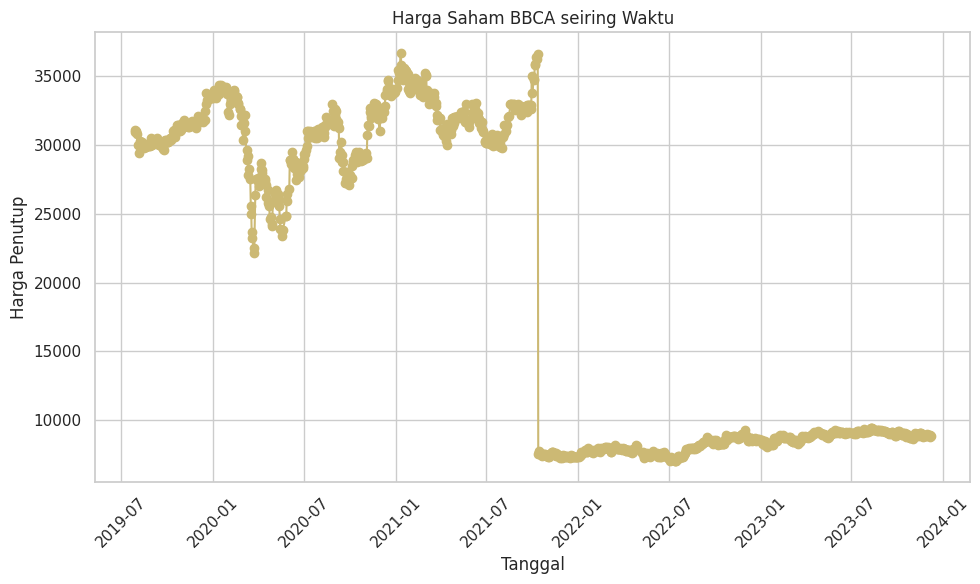

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(BBCA_new['date'], BBCA_new['close'], marker='o', linestyle='-', color='y')

plt.title('Harga Saham BBCA seiring Waktu')
plt.xlabel('Tanggal')
plt.ylabel('Harga Penutup')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
#Membuat fungsi windowing
BBCA_new_df = pd.DataFrame(BBCA_new)

# Fungsi Windowing
def create_windowed_df(df, window_size):
    features = []
    target = []

    for i in range(len(df) - window_size):
        window = df['close'].iloc[i:i+window_size].tolist()
        target_val = df['close'].iloc[i+window_size]
        features.append(window)
        target.append(target_val)

    columns = [f'X{i+1}' for i in range(window_size)] + ['target']
    windowed_df = pd.DataFrame(list(zip(features, target)), columns=['features', 'target'])
    windowed_df[['X1', 'X2', 'X3']] = pd.DataFrame(windowed_df['features'].tolist(), index=windowed_df.index)
    windowed_df = windowed_df[['X1', 'X2', 'X3', 'target']]

    return windowed_df

# Membuat Windowing dengan Size = 3
window_size = 3
result_df = create_windowed_df(BBCA_new_df, window_size)

print(result_df)

new_data = result_df

           X1       X2       X3   target
0     30950.0  31100.0  30950.0  31050.0
1     31100.0  30950.0  31050.0  30825.0
2     30950.0  31050.0  30825.0  30000.0
3     31050.0  30825.0  30000.0  29400.0
4     30825.0  30000.0  29400.0  30050.0
...       ...      ...      ...      ...
1062   8875.0   8900.0   8975.0   8950.0
1063   8900.0   8975.0   8950.0   8925.0
1064   8975.0   8950.0   8925.0   8900.0
1065   8950.0   8925.0   8900.0   8800.0
1066   8925.0   8900.0   8800.0   8825.0

[1067 rows x 4 columns]


In [ ]:
date_df = pd.DataFrame(date)
date_df = date_df.iloc[:-3]

print(date_df)

           date
0    2019-07-29
1    2019-07-30
2    2019-07-31
3    2019-08-01
4    2019-08-02
...         ...
1062 2023-11-28
1063 2023-11-29
1064 2023-11-30
1065 2023-12-01
1066 2023-12-04

[1067 rows x 1 columns]


In [ ]:
# Menggabungkan DataFrame berdasarkan indeks
merged_df = pd.concat([date_df, result_df], axis=1)

# Menampilkan DataFrame hasil penggabungan
print(merged_df)

           date       X1       X2       X3   target
0    2019-07-29  30950.0  31100.0  30950.0  31050.0
1    2019-07-30  31100.0  30950.0  31050.0  30825.0
2    2019-07-31  30950.0  31050.0  30825.0  30000.0
3    2019-08-01  31050.0  30825.0  30000.0  29400.0
4    2019-08-02  30825.0  30000.0  29400.0  30050.0
...         ...      ...      ...      ...      ...
1062 2023-11-28   8875.0   8900.0   8975.0   8950.0
1063 2023-11-29   8900.0   8975.0   8950.0   8925.0
1064 2023-11-30   8975.0   8950.0   8925.0   8900.0
1065 2023-12-01   8950.0   8925.0   8900.0   8800.0
1066 2023-12-04   8925.0   8900.0   8800.0   8825.0

[1067 rows x 5 columns]


In [ ]:
merged_df.isna().sum()

date      0
X1        0
X2        0
X3        0
target    0
dtype: int64

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1067 non-null   datetime64[ns]
 1   X1      1067 non-null   float64       
 2   X2      1067 non-null   float64       
 3   X3      1067 non-null   float64       
 4   target  1067 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 41.8 KB


In [ ]:
# Menggunakan DataFrame yang telah dibuat sebelumnya
X = merged_df[['date', 'X1' , 'X2', 'X3']]
y = merged_df['target']

# Memisahkan data menjadi train set dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_features = X_train.drop(columns=['date'])
X_test_features = X_test.drop(columns=['date'])

# Menampilkan ukuran dari train set dan test set
print(f"Jumlah data pada train set: {len(X_train)}")
print(f"Jumlah data pada test set: {len(X_test)}")

Jumlah data pada train set: 853
Jumlah data pada test set: 214


In [ ]:
dates_train = X_train['date']
dates_test = X_test['date']
dates_test_df = pd.DataFrame(dates_test)
dates_train_df = pd.DataFrame(dates_train)
X_train_df = pd.DataFrame(X_train)
y_train_df = pd.DataFrame(y_train)

Evaluasi dengan Regresi Linear

In [ ]:
# Membangun model regresi linear
linear_model = LinearRegression()

# Melatih model dengan data train
linear_model.fit(X_train_features, y_train)

# Melakukan prediksi pada data test
y_pred_linear = linear_model.predict(X_test_features)

# Evaluasi model
mse_linear = mean_squared_error(y_test, y_pred_linear)
print(f'Mean Squared Error pada Data Set (Linear Regression): {mse_linear}')


Mean Squared Error pada Data Set (Linear Regression): 125767.73964150605


In [ ]:
# Menyiapkan DataFrame perbandingan
comparison_df = pd.DataFrame({ 'Nilai Aktual': result_comparison_df['Actual'],
                              'Nilai Prediksi': y_pred_linear})

# Menambahkan kolom perbandingan untuk melihat selisih antara nilai aktual dan nilai prediksi
comparison_df['Perbedaan Nilai'] = comparison_df['Nilai Aktual'] - comparison_df['Nilai Prediksi']

# Menampilkan DataFrame perbandingan
print(comparison_df)


     Nilai Aktual  Nilai Prediksi  Perbedaan Nilai
732        7350.0     7371.779407       -21.779407
657        7925.0     7986.787008       -61.787008
168       27625.0    27466.713842       158.286158
86        31400.0    31219.047101       180.952899
411       30825.0    30755.481813        69.518187
..            ...             ...              ...
963        9175.0     9046.200323       128.799677
294       28900.0    28719.198517       180.801483
275       29525.0    29213.994165       311.005835
903        8750.0     8844.265632       -94.265632
941        9100.0     9176.617485       -76.617485

[214 rows x 3 columns]


In [ ]:
# Menggabungkan DataFrame berdasarkan indeks
merged1_df = pd.concat([dates_test_df, comparison_df], axis=1)

# Menampilkan DataFrame hasil penggabungan
print(merged1_df)

          date  Nilai Aktual  Nilai Prediksi  Perbedaan Nilai
732 2022-07-26        7350.0     7371.779407       -21.779407
657 2022-03-29        7925.0     7986.787008       -61.787008
168 2020-03-26       27625.0    27466.713842       158.286158
86  2019-11-26       31400.0    31219.047101       180.952899
411 2021-03-31       30825.0    30755.481813        69.518187
..         ...           ...             ...              ...
963 2023-07-07        9175.0     9046.200323       128.799677
294 2020-10-05       28900.0    28719.198517       180.801483
275 2020-09-08       29525.0    29213.994165       311.005835
903 2023-03-28        8750.0     8844.265632       -94.265632
941 2023-05-31        9100.0     9176.617485       -76.617485

[214 rows x 4 columns]


In [ ]:
# Menampilkan seluruh DataFrame perbandingan sebagai string
print(merged1_df.to_string(index=False))

      date  Nilai Aktual  Nilai Prediksi  Perbedaan Nilai
2022-07-26        7350.0     7371.779407       -21.779407
2022-03-29        7925.0     7986.787008       -61.787008
2020-03-26       27625.0    27466.713842       158.286158
2019-11-26       31400.0    31219.047101       180.952899
2021-03-31       30825.0    30755.481813        69.518187
2020-01-02       33700.0    33655.794347        44.205653
2020-11-30       32300.0    32183.465277       116.534723
2023-09-05        9125.0     9187.869633       -62.869633
2021-11-16        7425.0     7444.427406       -19.427406
2020-11-24       31925.0    32280.401636      -355.401636
2020-10-07       29275.0    28830.078152       444.921848
2023-05-10        8775.0     8818.738944       -43.738944
2023-11-27        8975.0     8915.765749        59.234251
2021-07-29       30725.0    29742.172738       982.827262
2023-07-04        9025.0     9090.159955       -65.159955
2022-04-25        8125.0     8216.209951       -91.209951
2021-04-28    

Grafik Perbedaan Nilai Aktual dan Prediksi

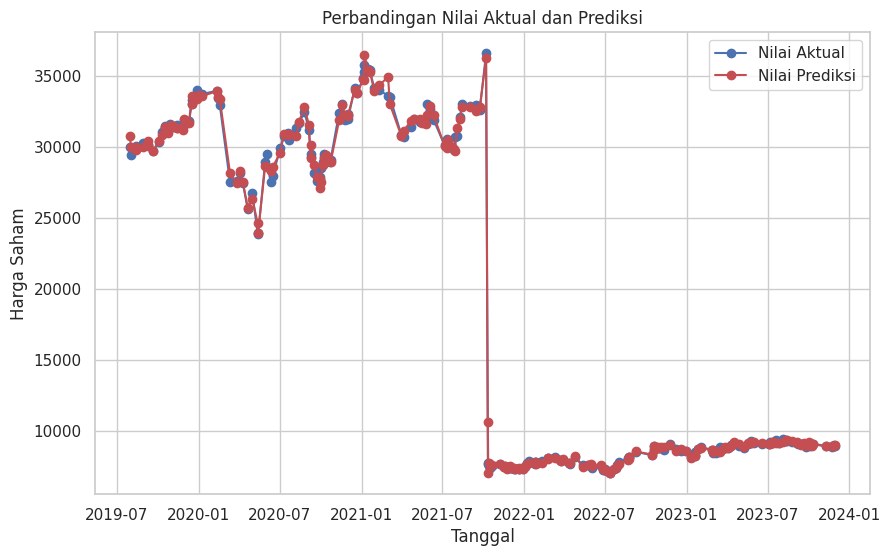

In [ ]:
# Ubah kolom tanggal menjadi tipe data datetime
merged1_df['date'] = pd.to_datetime(merged1_df['date'])

# Sorting dataframe berdasarkan tanggal (jika belum diurutkan)
merged1_df = merged1_df.sort_values(by='date')

# Plot Nilai Aktual dan Nilai Prediksi
plt.figure(figsize=(10, 6))
plt.plot(merged1_df['date'], merged1_df['Nilai Aktual'], marker='o', label='Nilai Aktual', linestyle='-', color='b')
plt.plot(merged1_df['date'], merged1_df['Nilai Prediksi'], marker='o', label='Nilai Prediksi', linestyle='-', color='r')

plt.title('Perbandingan Nilai Aktual dan Prediksi')
plt.xlabel('Tanggal')
plt.ylabel('Harga Saham')
plt.legend()
plt.grid(True)
plt.show()
